=== АНАЛИЗ ДАННЫХ ПОГОДНОЙ СТАНЦИИ ===
Всего записей в БД: 100

Последние 5 записей:
                         timestamp  temperature_c  humidity_percent  \
0 2026-01-08 11:27:37.610957+00:00           14.2                80   
1 2026-01-08 11:27:27.726903+00:00           15.0                57   
2 2026-01-08 11:27:22.706318+00:00           14.9                62   
3 2026-01-08 11:27:17.682687+00:00           17.2                62   
4 2026-01-08 11:27:12.655643+00:00           13.7                46   

  weather_condition  
0     partly_cloudy  
1               fog  
2               fog  
3             clear  
4             clear  

Статистика:
       temperature_c  humidity_percent  pressure_hpa  wind_speed_ms
count     100.000000        100.000000    100.000000     100.000000
mean       15.056000         64.140000   1005.210000       5.495000
std         1.781687         14.267304     14.654468       2.617053
min        12.100000         40.000000    980.000000       0.300000
25%

/tmp/ipykernel_282/702835046.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


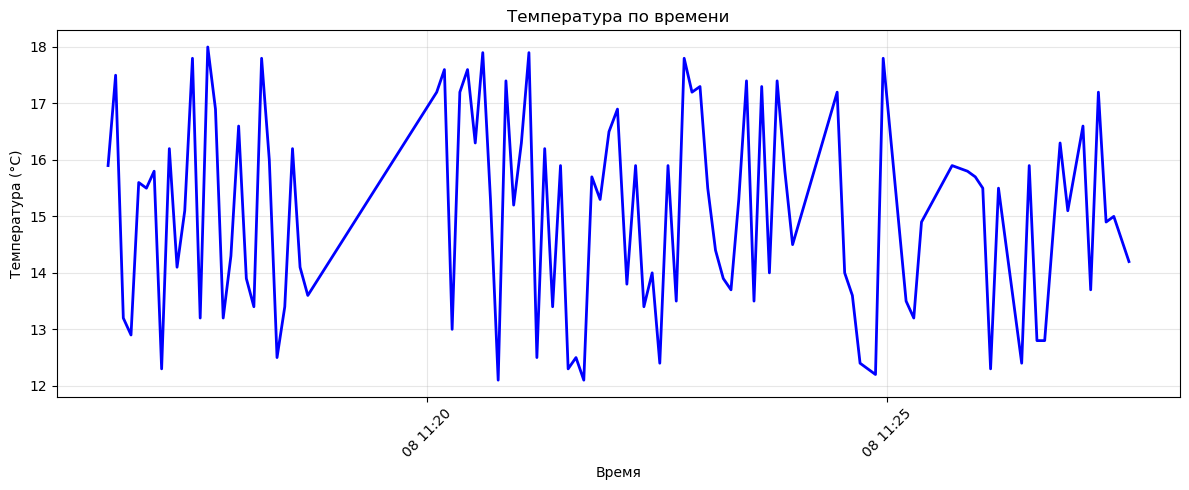

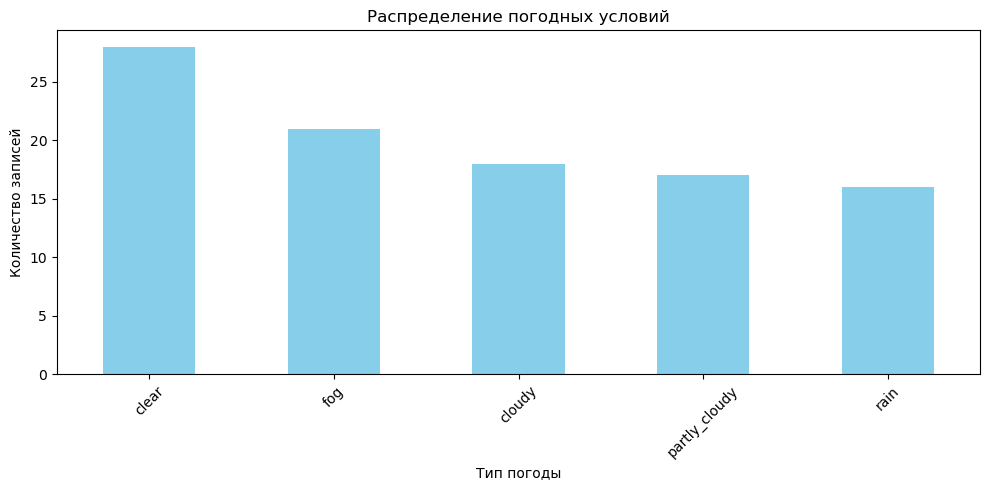

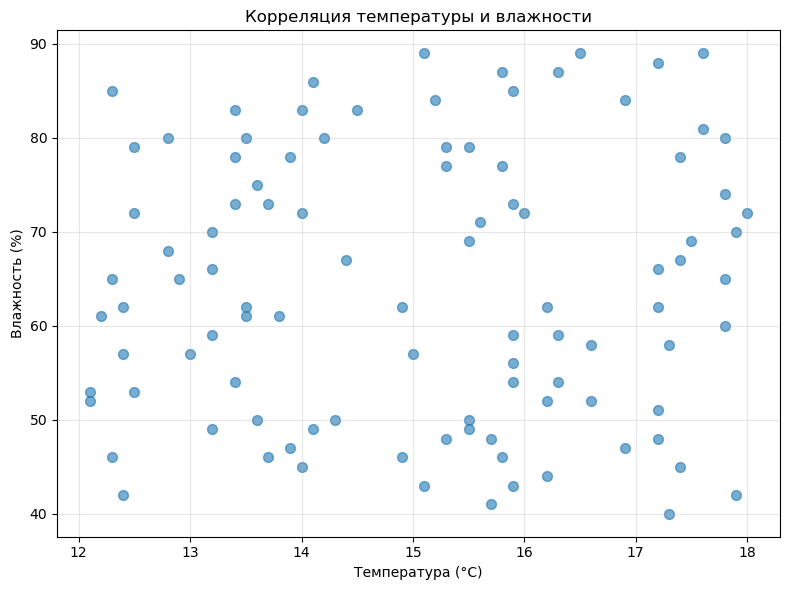


=== Последние 10 измерений ===
                         timestamp  temperature_c  humidity_percent weather_condition
0 2026-01-08 11:27:37.610957+00:00           14.2                80     partly_cloudy
1 2026-01-08 11:27:27.726903+00:00           15.0                57               fog
2 2026-01-08 11:27:22.706318+00:00           14.9                62               fog
3 2026-01-08 11:27:17.682687+00:00           17.2                62             clear
4 2026-01-08 11:27:12.655643+00:00           13.7                46             clear
5 2026-01-08 11:27:07.629782+00:00           16.6                58             clear
6 2026-01-08 11:26:57.726865+00:00           15.1                43               fog
7 2026-01-08 11:26:52.706030+00:00           16.3                59            cloudy
8 2026-01-08 11:26:42.659640+00:00           12.8                68               fog
9 2026-01-08 11:26:37.623473+00:00           12.8                80             clear


In [3]:
!pip install psycopg2-binary pandas matplotlib seaborn
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Подключение к БД
conn = psycopg2.connect(
    host="postgres",
    database="weather_db",
    user="postgres",
    password="password",
    port=5432
)

# Загрузка данных
query = "SELECT * FROM weather_metrics ORDER BY timestamp DESC LIMIT 100"
df = pd.read_sql(query, conn)

print("=== АНАЛИЗ ДАННЫХ ПОГОДНОЙ СТАНЦИИ ===")
print(f"Всего записей в БД: {len(df)}")
print("\nПоследние 5 записей:")
print(df[['timestamp', 'temperature_c', 'humidity_percent', 'weather_condition']].head())

print("\nСтатистика:")
print(df[['temperature_c', 'humidity_percent', 'pressure_hpa', 'wind_speed_ms']].describe())

# График 1: Температура по времени
plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['temperature_c'], 'b-', linewidth=2)
plt.title('Температура по времени')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# График 2: Распределение погодных условий
plt.figure(figsize=(10, 5))
df['weather_condition'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение погодных условий')
plt.xlabel('Тип погоды')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График 3: Корреляция температура-влажность
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_c'], df['humidity_percent'], alpha=0.6, s=50)
plt.title('Корреляция температуры и влажности')
plt.xlabel('Температура (°C)')
plt.ylabel('Влажность (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Таблица последних данных
print("\n=== Последние 10 измерений ===")
print(df[['timestamp', 'temperature_c', 'humidity_percent', 'weather_condition']].head(10).to_string())

conn.close()